In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
import pandas.api.types as ptypes
    
#Scikit-learn for one hot encoding
# from sklearn.preprocessing import LabelEncoder

class DataPreprocessing:
    
    #class constructor
    def __init__(self):
        # learning_rate is a alpha
        self.learning_rate = 0.01
        self.epoch = 10000
        self.theta_0 = 0.5
        self.theta_1 = 1
        
    # Display datafile
    def display_data(self):
        self.file = input("Enter the file name:")

        file_exist = os.path.exists(self.file)
        # Exception Handling for file
        try:
            f = open(self.file, 'rb')
            # read csv file
            self.df = pd.read_csv(self.file)
#             print("\n",self.df)
            # Head and tail functions show fist and last 5 rows of dataset 
            print("\nHead \n:", self.df.head())
            print("\nTail \n", self.df.tail())
            print("\nType of DF: ",type(self.df))
            # descibe dataframe
            print("\nDescribe Data: \n",self.df.describe())
            print("\nColumns are: \n",self.df.columns)
            print("\n Shape of dataset(rows and columns): \n", self.df.shape)
            
        except FileNotFoundError as ex:
            print("\nInvalid file Name",ex)
        
    """Handling Missing Data"""
    def missing_data(self):
        # drop unrequired ddata columns
        #self.df = self.df.drop()
        print("\nDrop unwanted columns")
        self.df  = self.df.loc[:,['Apparent Temperature (C)', 'Humidity']]
        print("\n",self.df.head())
        print("\nData type of each column:\n",self.df.dtypes)
        
        #check null values in each column
        check = self.df.isnull().sum()
        print("\nNull values in dataset:\n",check)
       
        self.df.rename(columns={'Apparent Temperature (C)':'App_temp','Humidity':'Humi'}, inplace=True)
        print("\nRename Columns:\n",self.df.head())
        
    # check outlieers for columns
    def check_outliers(self):
#         self.df.boxplot()
#         show()     
        sb.boxplot(self.df['App_temp'])
        plt.title("Temprature outliers")
        plt.show()
        
        sb.boxplot(self.df['Humi'])
        plt.title("Humidity outliers ")
        plt.show()
        
    # remove outliers
    def remove_outlier(self):
        low = .05
        high = .95
        quant_df = self.df.quantile([low, high])
        for App_temp in list(self.df.columns):
            if ptypes.is_numeric_dtype(self.df[App_temp]):
                self.df = self.df[(self.df[App_temp] > quant_df.loc[low, App_temp]) & (self.df[App_temp] < quant_df.loc[high, App_temp])]
        sb.boxplot(self.df)  

        
    def check_skew(self):
        """If skewness value lies above +1 or below -1, data is highly skewed. 
        If it lies between +0.5 to -0.5, it is moderately skewed. 
        If the value is 0, then the data is symmetric"""
        
        print("\n Mean: \n",self.df.mean(), "\n\nSkew : \n",self.df.skew(), "\n\nMedian: \n", self.df.median())
        sb.distplot(self.df['App_temp'])
        plt.show()
        
        sb.distplot(self.df['Humi'])
        plt.show()
        mean_col1 = self.df['App_temp'].mean()
        medi_col1 = self.df['App_temp'].median()
        
        mean_col2 = self.df['Humi'].mean()
        modi_col2 = self.df['Humi'].median()
        
        print("\nFor Apparent Temperature (C):")
        if mean_col1 <= medi_col1:
            print("Left skew")
        elif mean_col1 >= medi_col1: 
            print("Right skew")
        else:
            print("data is symmetric")
            
        print("\nFor Humidity :")
        if mean_col2 <= modi_col2:
            print("Left skew")
        elif mean_col2 >= modi_col2: 
            print("Right skew")
        else:
            print("data is symmetric")
            
    def remove_skew_sqrt(self):
#         print("\nSkewness for Humidity")
#         self.df['Humi'] = (np.square((self.df['Humi'])))
#         print('Skewness is :', self.df['Humi'].skew())
#         sb.distplot(self.df['Humi'])
#         plt.show()
#         print("Mean: ",self.df['Humi'].mean(),"Median: ", self.df['Humi'].median())
# #         self.df['Humi'] = target
#         print("Draw histogram")
#         plt.hist(self.df['Humi'])
#         plt.show()
#         """Mean:  0.588020584095261 Median:  0.6241000000000001  Skewness is : -0.3344763228424865"""
        
        print("\nSkewness for Temperature")
        self.df['App_temp'] = (np.square((self.df['App_temp'])))
        print('Skewness is :', self.df['App_temp'].skew())
        sb.distplot(self.df['App_temp'])
        plt.show()
        print("Mean: ",self.df['App_temp'].mean(),"Median: ", self.df['App_temp'].median())
#         self.df['Humi'] = target
        print("Draw histogram")
        plt.hist(self.df['App_temp'])
        plt.show()
    
    def remove_skew_cbrt(self):
#         print("\nSkewness for Humidity")
#         self.df['Humi'] = (np.cbrt((self.df['Humi'])))
#         print('Skewness is :', self.df['Humi'].skew())
#         sb.distplot(self.df['Humi'])
#         plt.show()
#         print("Mean: ",self.df['Humi'].mean(),"Median: ", self.df['Humi'].median())
# #         self.df['Humi'] = target
#         print("Draw histogram")
#         plt.hist(self.df['Humi'])
#         plt.show()
#         #Mean:  0.588020584095261 Median:  0.6241000000000001  Skewness is : -0.3344763228424865
        
        print("Skewness for Temperature")
        self.df['App_temp'] = (np.cbrt((self.df['App_temp'])))
        print('Skewness is :', self.df['App_temp'].skew())
        sb.distplot(self.df['App_temp'])
        plt.show()
        print("Mean: ",self.df['App_temp'].mean(),"Median: ", self.df['App_temp'].median())
#         self.df['Humi'] = target
        print("Draw histogram")
        plt.hist(self.df['App_temp'])
        plt.show()
        
    """      
    def remove_skew_log(self):
        print("\nSkewness for Humidity")
        self.df['Humi'] = (np.log((self.df['Humi'])))
        print('Skewness is :', self.df['Humi'].skew())
        sb.distplot(self.df['Humi'])
        plt.show()
        print("Mean: ",self.df['Humi'].mean(),"Median: ", self.df['Humi'].median())
#         self.df['Humi'] = target
        print("Draw histogram")
        plt.hist(self.df['Humi'])
        plt.show()
        #Mean:  0.588020584095261 Median:  0.6241000000000001  Skewness is : -0.3344763228424865
        
        """ 
        
#         print("Skewness for Temperature")
#         self.df['App_temp'] = (np.log((self.df['App_temp'])))
#         print('Skewness is :', self.df['App_temp'].skew())
#         sb.distplot(self.df['App_temp'])
#         plt.show()
#         print("Mean: ",self.df['App_temp'].mean(),"Median: ", self.df['App_temp'].median())
# #         self.df['Humi'] = target
#         print("Draw histogram")
#         plt.hist(self.df['App_temp'])
#         plt.show()
    """Remove the skewness
	1.  Square root method
	2. Cube root method
	3. Log method
	4. Inverse method
	5. The root of square method
    """
    
    def feature_scaling(self):       
        print("\n By Z score Method(Standerdization)  ")
        
        self.df = np.divide((self.df - self.df.mean()), self.df.std())
#         self.df['App_temp'] = np.divide((self.df['App_temp'] - self.df['App_temp'].mean()), self.df['App_temp'].std())
#         self.df['Humi'] =  np.divide((self.df['Humi'] - self.df['Humi'].mean()),self.df['Humi'].std())
        print(self.df.head())
    
    def split(self):
        train_per = int(0.70*len(self.df))
        test_per = len(self.df)-train_per
#         X_train_set = self.df.head(train_per)
#         Y_train_set = self.df.tail(test_per)
       
        # display data
        print("\nTraining set")
        print(train_per)
        print("\nTest data set")
        print(test_per)
       
        print("Convert pandas dataframe into numpy")
       
        x_train_data = np.array(self.df.App_temp[:train_per])   
        y_train_data = np.array(self.df.Humi[:train_per])

        x_test_data = np.array(self.df.App_temp[:test_per])
        y_test_data = np.array(self.df.Humi[:test_per])
       
      
        return x_train_data,y_train_data,x_test_data,y_test_data
    
    def gradient_descent(self,x_train_data, y_train_data):
        cost = 0
            
        fig = plt.figure()
        fig, (ax1, ax2, ax3,ax4) = plt.subplots(nrows=4, ncols=1, figsize=(5, 20))
    
        size = len(x_train_data)
        vector = np.ones(size)
        hypo_1 = 0.0
        hypo_2 = 0.0
        cost_temp = 0.0
        for iteration in range(self.epoch):
            hypo_1 = 0.0
            hypo_2 = 0.0
            cost = 0
            cost_temp = 0.0
            for row in range(size):
                hypo = ((self.theta_0 * vector[row])  + (self.theta_1 * x_train_data[row]))
                hypo_1 += hypo - y_train_data[row]
                hypo_2 += (hypo - y_train_data[row]) * x_train_data[row]
                cost += hypo - y_train_data[row]

            cost_temp +=(hypo - y_train_data[row]) ** 2 
            cost = (1/2 * size)* cost_temp
            self.theta_0 = self.theta_0 -((self.learning_rate/ size) * hypo_1)
            self.theta_1 = self.theta_1 -((self.learning_rate/ size)* hypo_2)
        
#         for counter in range(0, self.epoch):
            if(iteration%100 == 0):
                # plt.plot(counter,loss_error_sum, marker='x', color='r')
                ax1.plot(iteration,self.theta_0,marker='o',color='r')
                ax1.set_title('iteration vs theta 0')
                ax2.plot(iteration,self.theta_1,marker='8',color='g')
                ax2.set_title('iteration vs theta 1')
                ax3.plot(iteration,cost,marker='*',color='b')
                ax3.set_title('iteration vs cost')
                ax4.plot(self.theta_0,self.theta_1,marker = 'x', color='black')
                ax4.set_title('theta_0 vs theta_1')
            if(cost<=0.00009): 
                break

        plt.subplots_adjust(hspace=1)
        plt.show()
        print("iteration = {} and cost function = {}".format(iteration, cost))
            
        return [self.theta_0,self.theta_1], cost
        
    # y_prediction for test dataset
    def predict (self, x_test_data,theta_00):
        
        n = len(x_test_data)
        y_predict = [None]*n
        vector = np.ones(n)
        for row in range (n):
            y_predict[row] = theta_00[0] * vector[row]  + theta_00[1] * x_test_data[row] 
        # y prediction for test
        return y_predict
    
    # y_prediction for test dataset
    def predict_new(self, x_train_data,theta_00):
        
        n = len(x_train_data)
        y_predict_train = [None]*n
        vector = np.ones(n)
        for row in range (n):
            y_predict_train[row] = theta_00[0] * vector[row]  + theta_00[1] * x_train_data[row] 
            #for train
        return y_predict_train
   
     
    def accuracy(self, y_test_data, y_predict):
         
        print("y", y_test_data.shape)
        total_error = 0
        for i in range(0, len(y_test_data)):
            total_error += abs((y_predict[i] - y_test_data[i]) / y_test_data[i])
        total_error = (total_error / len(y_test_data))
        accuracy = 1 - total_error
        return accuracy * 100

    # scatter plot on x_test y_test data vs x_test y_pre      
    def graph(self, x_train_data, y_train_data, y_predict): 
        print(len(x_train_data))
        print(len(y_train_data))
        print(len(y_predict))
        
        plt.scatter(x_train_data, y_train_data , color = 'b', label = "train data set")
        plt.plot(x_train_data, y_predict, color = 'r', label = "predicted value")
        plt.title("Train data")
#         plt.subplot(2,2,1)
        
        plt.legend()
        plt.show()
        
    # scatter plot on x_test_data, y_test_data data vs x_test y_pre   
    def plotgraph(self, x_test_data, y_test_data, y_predict):
        print(len(x_test_data))
        print(len(y_test_data))
        print(len(y_predict))
        
        plt.scatter(x_test_data, y_test_data , color = 'g', label = "test data")
        plt.plot(x_test_data, y_predict,color = 'r', label = "predicted value")

        plt.title("Test data")
#         plt.subplot(2,2,1)
        plt.legend()
        plt.show()

    
# class Object created to call its method
obj = DataPreprocessing()



In [2]:
obj.display_data()

Enter the file name:weatherHistory.csv

Head 
:                   Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0     

In [3]:
obj.missing_data()


Drop unwanted columns

    Apparent Temperature (C)  Humidity
0                  7.388889      0.89
1                  7.227778      0.86
2                  9.377778      0.89
3                  5.944444      0.83
4                  6.977778      0.83

Data type of each column:
 Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

Null values in dataset:
 Apparent Temperature (C)    0
Humidity                    0
dtype: int64

Rename Columns:
    App_temp  Humi
0  7.388889  0.89
1  7.227778  0.86
2  9.377778  0.89
3  5.944444  0.83
4  6.977778  0.83


In [4]:
# obj.split_data()

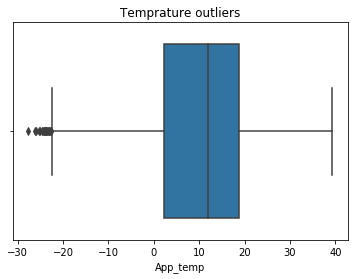

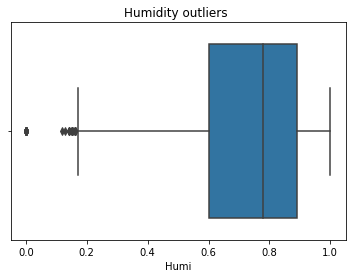

In [5]:
obj.check_outliers()

Outliers are removed


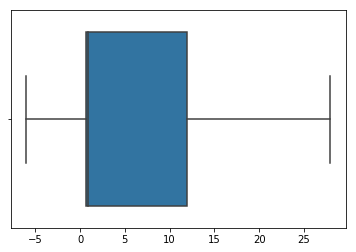

In [6]:
print("Outliers are removed")
obj.remove_outlier()

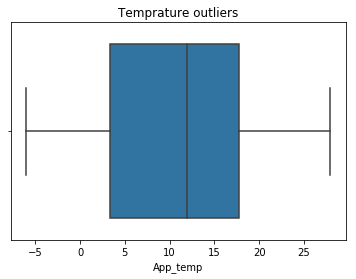

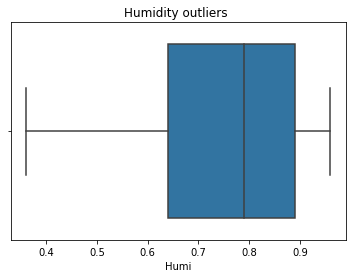

In [7]:
obj.check_outliers()

Check skewness for dataset columns:

 Mean: 
 App_temp    10.810788
Humi         0.749642
dtype: float64 

Skew : 
 App_temp   -0.073296
Humi       -0.655728
dtype: float64 

Median: 
 App_temp    11.966667
Humi         0.790000
dtype: float64


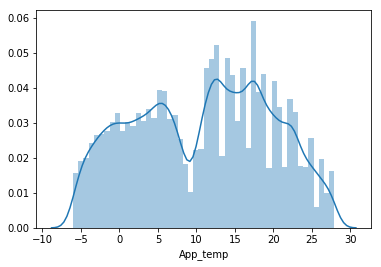

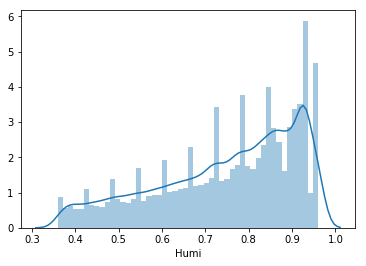


For Apparent Temperature (C):
Left skew

For Humidity :
Left skew


In [8]:
print("Check skewness for dataset columns:")
obj.check_skew()

Remove skewness using cuberoot method

Skewness for Temperature
Skewness is : 0.9548100214377451


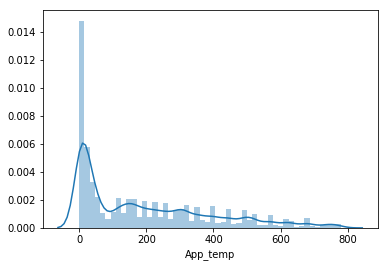

Mean:  195.0209091147486 Median:  143.20111111111106
Draw histogram


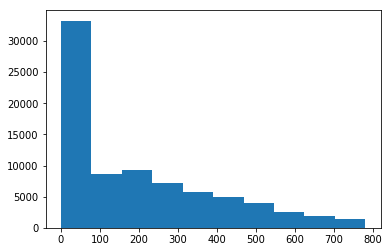

In [9]:
print("Remove skewness using cuberoot method")
# obj.remove_skew_cbrt()
obj.remove_skew_sqrt()

In [10]:
obj.feature_scaling()


 By Z score Method(Standerdization)  
   App_temp      Humi
0 -0.702122  0.869488
1 -0.713896  0.683645
2 -0.535388  0.869488
3 -0.798418  0.497802
4 -0.731653  0.497802


In [11]:
x_train_data, y_train_data, x_test_data, y_test_data = obj.split()
# print(x_train_data)


Training set
55199

Test data set
23658
Convert pandas dataframe into numpy


<Figure size 432x288 with 0 Axes>

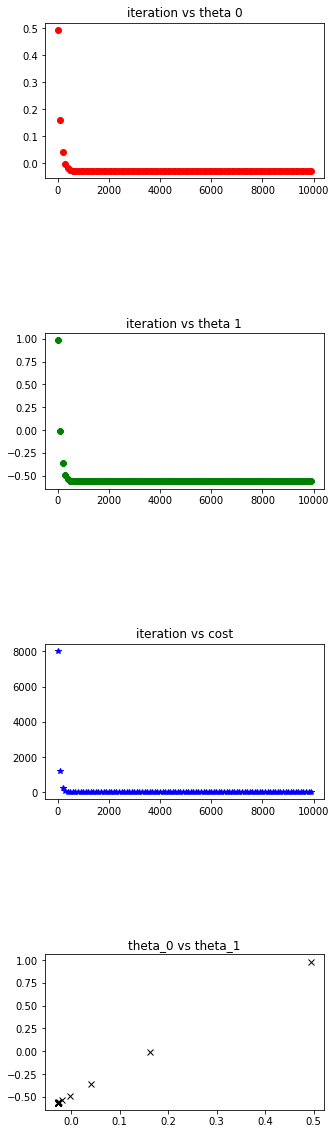

iteration = 9999 and cost function = 18.83867960457765


In [12]:
theta_0 , cost = obj.gradient_descent(x_train_data, y_train_data)

In [13]:
y_predict = obj.predict (x_test_data,theta_0)
# print("Prediction", y_predict)

In [14]:
acc = obj.accuracy(y_test_data, y_predict)
print("Accuracy", acc)

y (23658,)
Accuracy -322.26801125165656


In [15]:
yy = obj.predict_new(x_train_data,theta_0)

55199
55199
55199


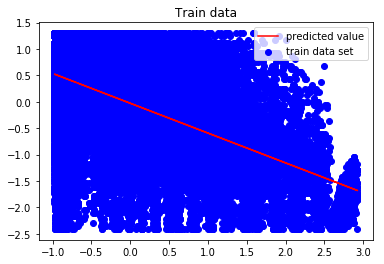

In [16]:
#train data set
obj.graph(x_train_data, y_train_data , yy)

23658
23658
23658


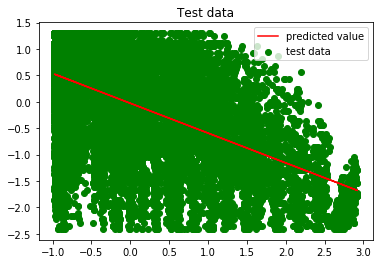

In [17]:
#test dataset
obj.plotgraph( x_test_data, y_test_data, y_predict)